In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
EPOCHS = 20


2023-12-04 10:18:53.952637: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-04 10:18:54.010101: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 10:18:54.773799: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

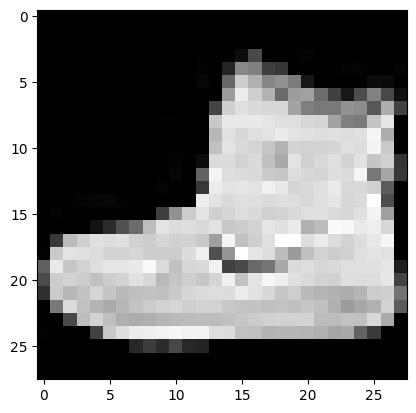

In [4]:
plt.imshow(x_train[0], cmap='gray')

In [5]:
pd.options.display.max_columns = None
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


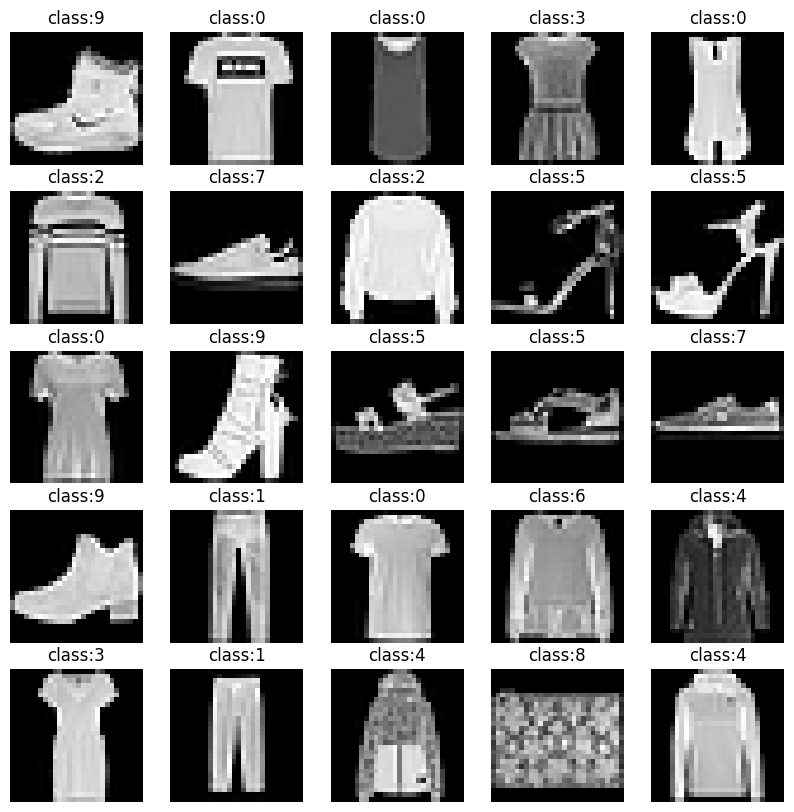

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title("class:"+str(y_train[i]))

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 676)               0         
                                                                 
 dense (Dense)               (None, 10)                6770      


2023-12-04 10:18:57.517246: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-04 10:18:57.517294: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: dziobak
2023-12-04 10:18:57.517304: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: dziobak
2023-12-04 10:18:57.517441: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2023-12-04 10:18:57.517474: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2023-12-04 10:18:57.517482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


                                                                 
Total params: 6,810
Trainable params: 6,810
Non-trainable params: 0
_________________________________________________________________


In [9]:
history= model.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])
hist = pd.DataFrame(history.history)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5557 - accuracy: 0.8104 - val_loss: 0.4429 - val_accuracy: 0.8448
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3904 - accuracy: 0.8626 - val_loss: 0.3930 - val_accuracy: 0.8651
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3592 - accuracy: 0.8743 - val_loss: 0.3871 - val_accuracy: 0.8653
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3441 - accuracy: 0.8801 - val_loss: 0.3689 - val_accuracy: 0.8737
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3307 - accuracy: 0.8842 - val_loss: 0.3554 - val_accuracy: 0.8754
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3201 - accuracy: 0.8868 - val_loss: 0.3512 - val_accuracy: 0.8769
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3130 - accuracy: 0.8891 - val_loss: 0.3482 - val_ac

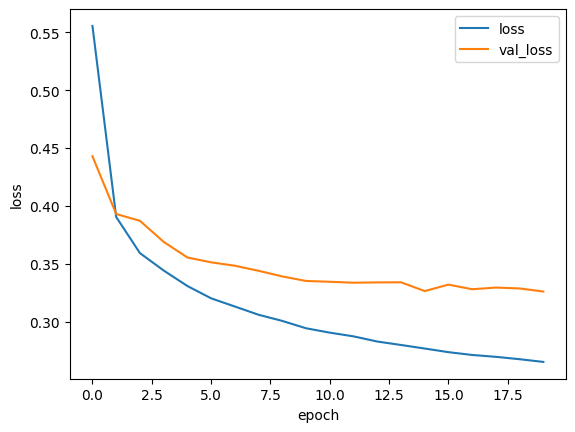

In [10]:
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [11]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


[1.2733561e-07 4.2842037e-09 1.1561904e-06 9.9329645e-07 4.1882782e-07
 1.6625165e-03 4.4090825e-06 1.4842197e-02 8.2429202e-04 9.8266393e-01]


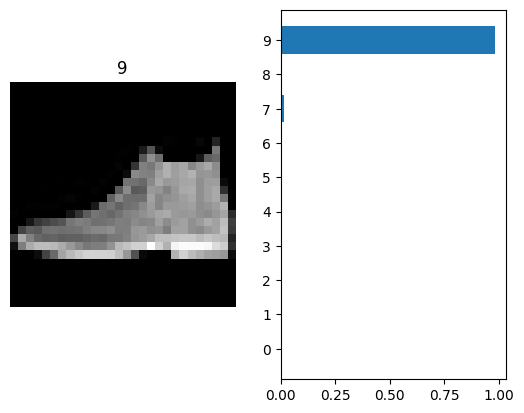

In [12]:
plt.subplot(1,2,1)
plt.imshow(x_test[0], cmap='gray')
plt.axis('off')
plt.title(y_test[0])

plt.subplot(1,2,2)
plt.barh(np.arange(10), y_pred[0])
plt.yticks(np.arange(10))
print(y_pred[0])

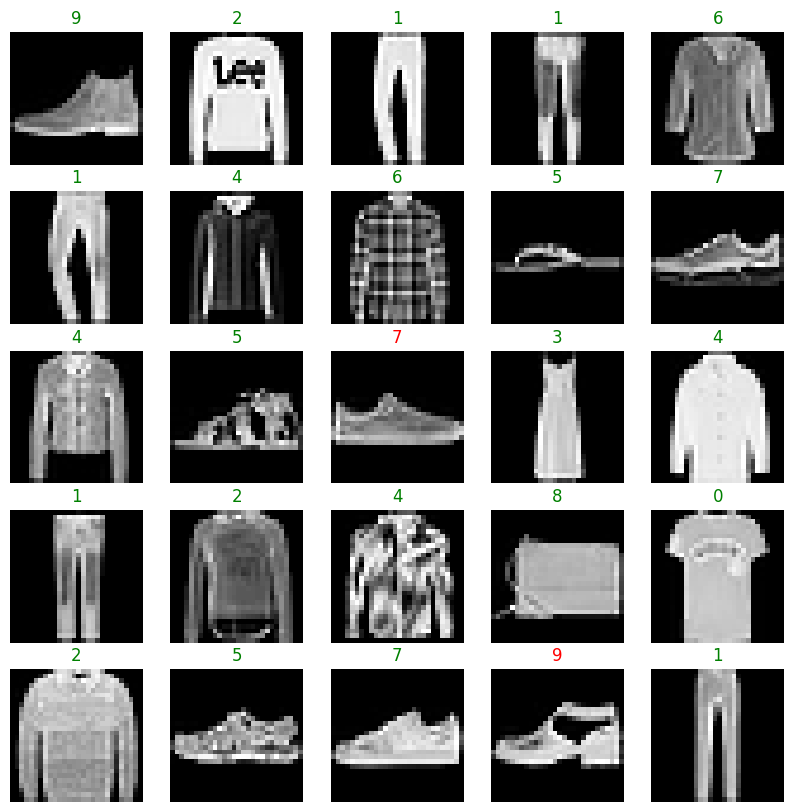

In [13]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    if np.argmax(y_pred[i]) == y_test[i]:
        plt.title(y_test[i], color = 'green')
    else:
        plt.title(y_test[i], color = 'red')